In [1]:
# notebook import

from ipynb.fs.full.data_processing import *

In [2]:
# user input parameters

# boolean parameter to dictate whether figures are saved
save = True

# boolean parameter to dictate whether figures are plotted with the point at start point
start = True

# boolean parameter to dictate whether figures are plotted with the relative temperature
temp = False

# number over which the plot of temperature will be averaged 
temp_avg = 10

# number over which the plot of mutual information will be averaged 
emd_avg = [0, 10, 20]

# list of colors corresponding to specific wells used in figures
colors = ['sienna', 'tomato', 'orange', 'darkgoldenrod', 'yellowgreen', 'limegreen', 'teal', 'deepskyblue', 'royalblue', 'slateblue', 'darkviolet', 'orchid', 'pink']


In [3]:
# function declaration

# input: None
# output: dictionary mapping each feature to a dictionary of wells mapped to theis lists of emd through time
def get_emd_dict():
    res = {}
    for feature in feature_name_list:
        res[feature] = {}
        for well in well_id_list: 
            emd_series = pd.read_csv(results_fpath + emd_ext + f'{feature}_{well}_emd_list.csv')['emd']
            res[feature][well] = emd_series
    return res

# input: feature of interest (feature), and an average over which emd will be plotted
# output: None (plots emd index as a function of time)
def plot_emd_all(feature, avg):
    
    for well, color in zip(well_id_list, colors):
        
        x, y = avg_plot(timestep_scaled, emd_dict[feature][well], avg)
        plt.plot(x, y, label=f'{well}', color=color)
    
    if temp:
        scaled_temp = scale(temp_series, emd_dict[feature]['01'])
        x_temp, y_temp = avg_plot(temp_mins, scaled_temp, temp_avg)
        plt.plot(x_temp, y_temp, color='black', label="Relative Temperature")
        
    if start:
        plt.axvline(start_plot, color='gray', linestyle='--', label=f'Start')
        
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f"{proper_feature[feature]} Earth Mover's distance as a function of time")
    plt.xlabel('Time (min)')
    plt.ylabel("Earth Mover's Distance")
    
    if save: 
        plt.savefig(results_fpath + emd_ext + f'emd_all_plots/{feature}_emd_all_{avg}{ext}.png', dpi=300,  bbox_inches='tight')
        
    plt.show()
    return


In [4]:
def main():
    
    # declare global variable ext for filepath of saved figure
    global ext
    ext = ''
    if temp:
        f'_temp_{temp_avg}'
    if start:
        ext += '_start'
      
    global emd_dict
    emd_dict = get_emd_dict()
    
    for feature in feature_name_list:
        
        for avg in emd_avg:
        
            plot_emd_all(feature, avg)
            
    return 

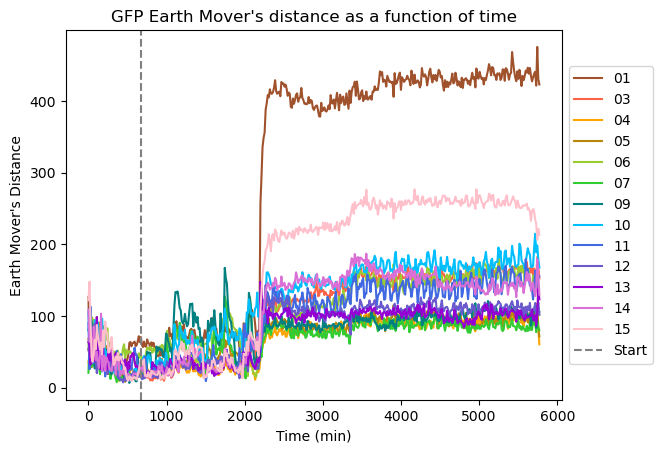

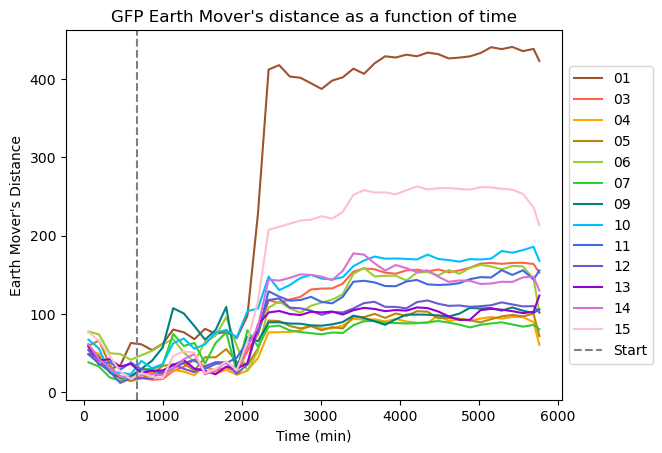

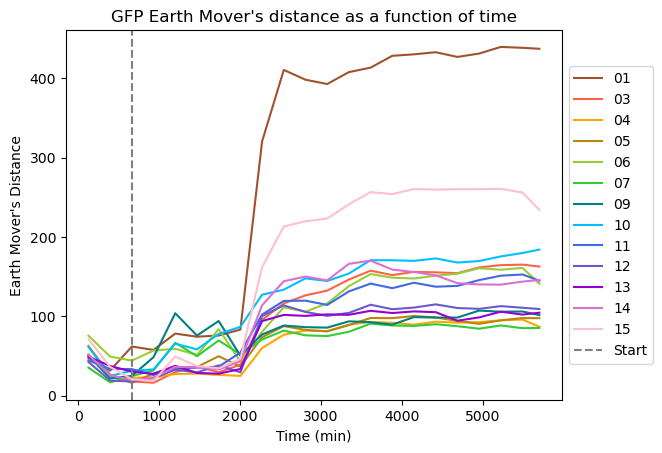

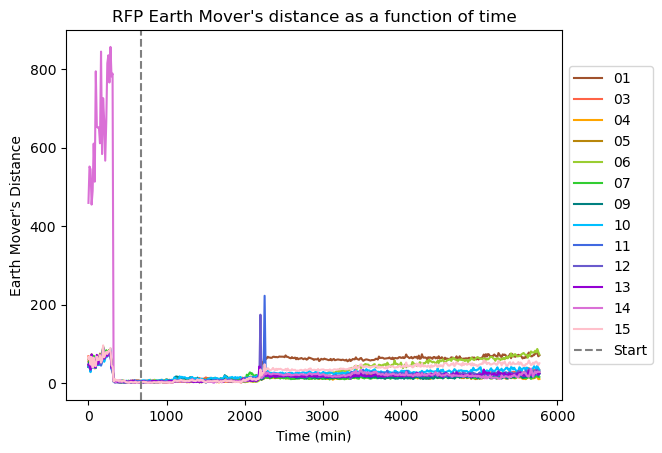

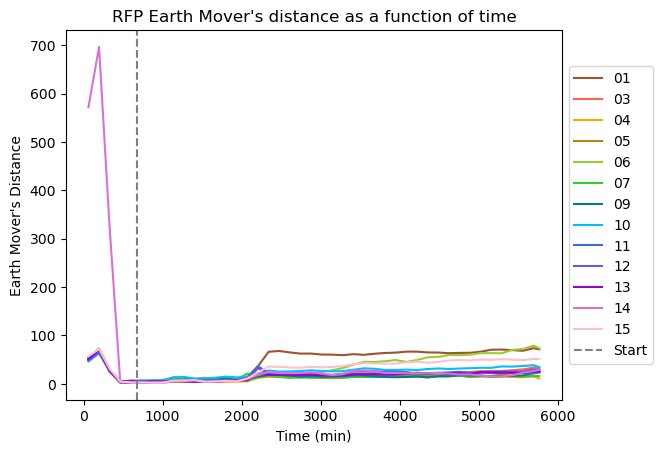

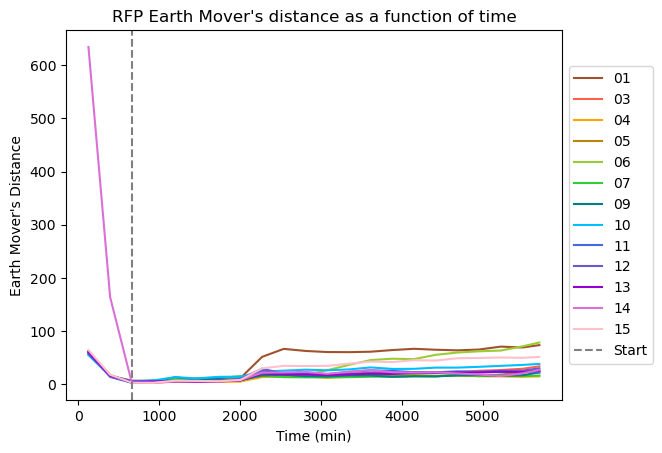

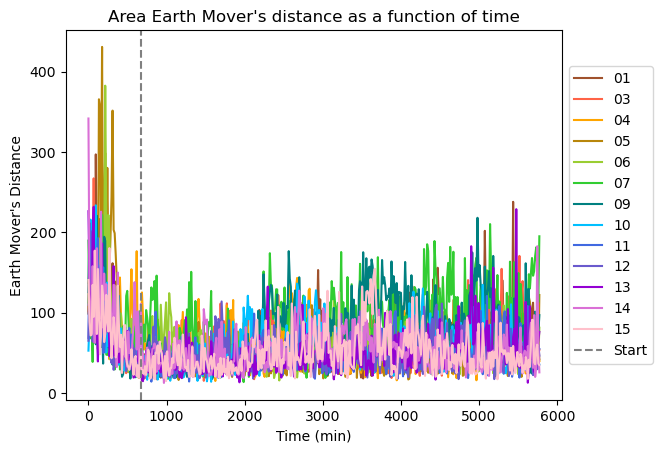

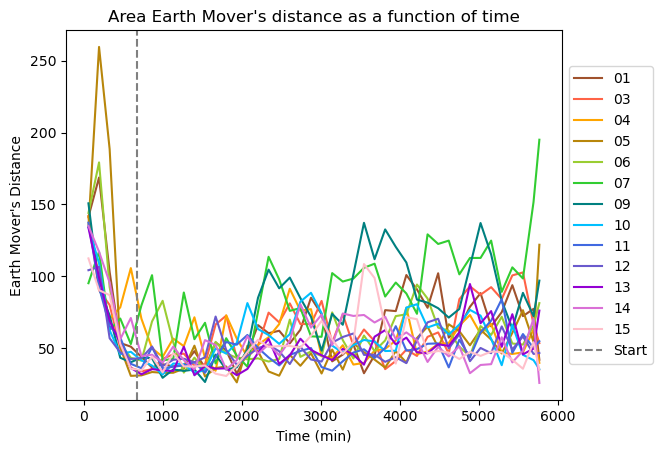

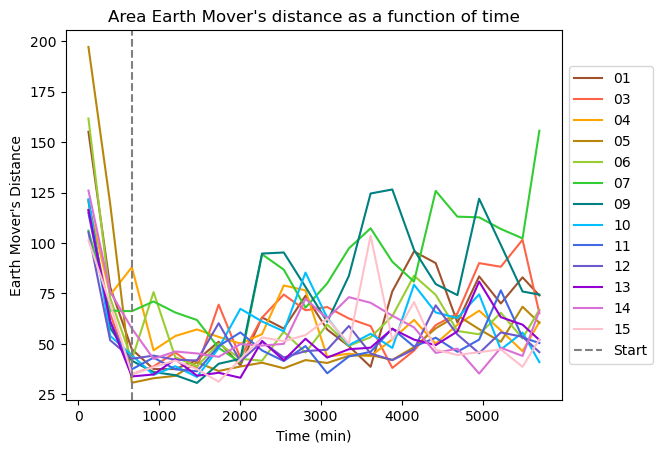

In [5]:
# call to 'main()' function

main()